# Network Extraction

One of the more interesting and powerful tricks that can be done to a volumetric image is extracting a network representing the void space. 

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

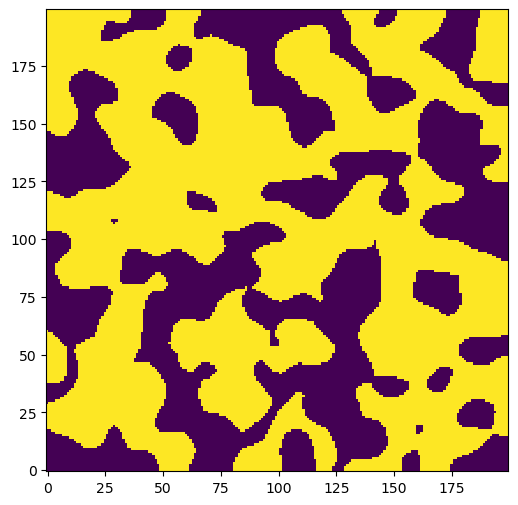

In [5]:
im = ps.generators.blobs([200, 200], porosity=0.6)
fig, ax = plt.subplots(figsize=[6, 6])
ax.imshow(im, origin='lower', interpolation='none');

## Applying the SNOW Algorithm

PoreSpy V2 includes the ``snow2`` function, which is an evolution of the original function with the following features:
- Simple addition of boundary pores
- Unlimited number of phases
- Parallelized watershed step for improved speed

Using the defaults gives:

In [31]:
sn = ps.networks.snow2(im)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/74 [00:00<?, ?it/s]

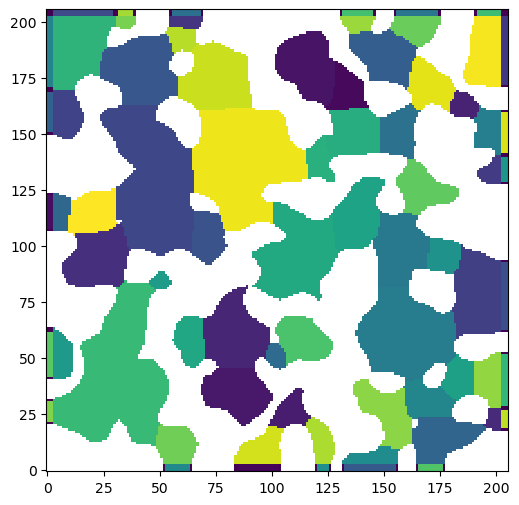

In [60]:
fig, ax = plt.subplots(figsize=[6, 6])
ax.imshow(ps.tools.randomize_colors(sn.regions)/(sn.phases > 0), interpolation='none', origin='lower');

## Overlay Image and Pore Network

Without covering pore network modeling too much, it's possible to overlay the extracted network on top of the image

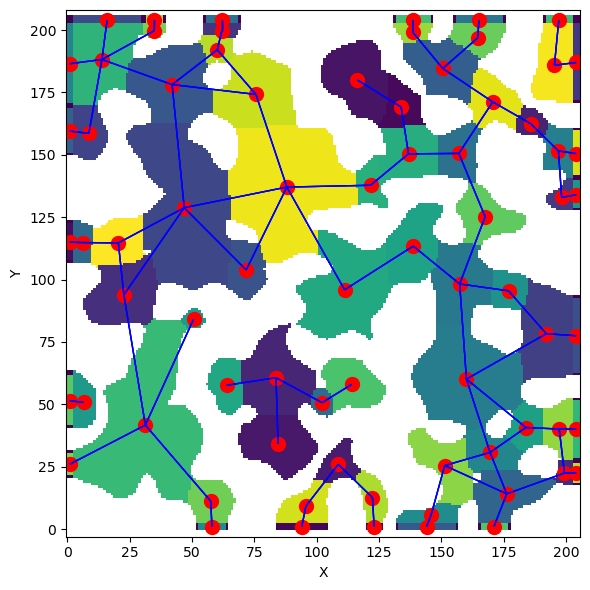

In [63]:
import openpnm as op
pn = op.io.network_from_porespy(sn.network)
pn['pore.coords'] = pn.coords[:, [1, 0, 2]]
ax = op.visualization.plot_connections(pn, ax=ax)
ax = op.visualization.plot_coordinates(pn, s=100, ax=ax)
fig

## Applying to Multiple Phases
---
One of the most interesting feature of ``snow2`` it the ability to do 'multiphase' extractions.

- This is essential for electrochemical devices since solid phase transport is crucial
- Has also been used for 'multiscale' modeling where the 2nd phase is unresolved pore space (i.e. clay) and treated as continuum nodes

In [64]:
sn2 = ps.networks.snow2(phases=im.astype(int)+1)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/155 [00:00<?, ?it/s]

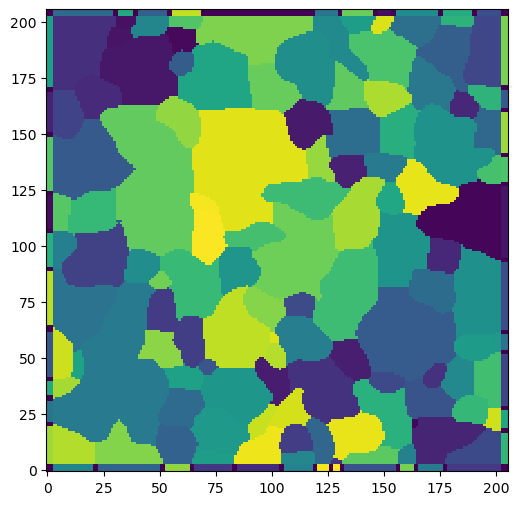

In [72]:
fig, ax = plt.subplots(figsize=[6, 6])
ax.imshow(ps.tools.randomize_colors(sn2.regions), interpolation='none', origin='lower');

### Overlaying Both Networks on the Multiphase Image

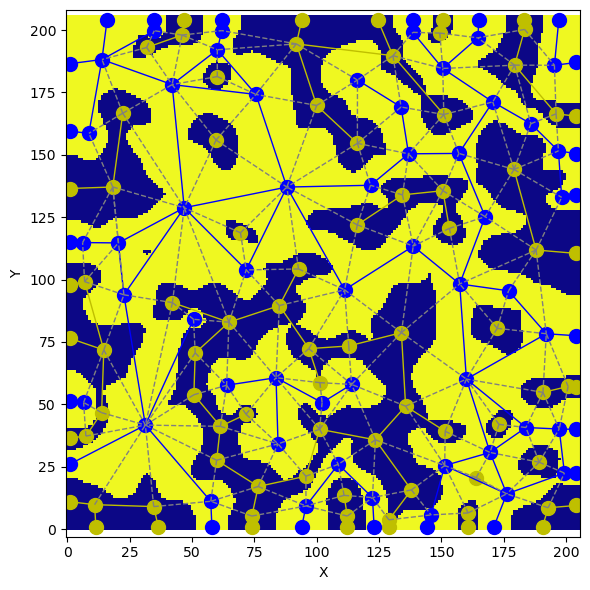

In [85]:
pn = op.io.network_from_porespy(sn2.network)
pn['pore.coords'] = pn.coords[:, [1, 0, 2]]
fig, ax = plt.subplots(figsize=[6, 6])
ax.imshow(sn2.phases, cmap=plt.cm.plasma, interpolation='none', origin='lower');
ax = op.visualization.plot_connections(pn, throats=pn.throats('phase1_phase1'), c='y', ax=ax)
ax = op.visualization.plot_connections(pn, throats=pn.throats('phase2_phase2'), c='b', ax=ax)
ax = op.visualization.plot_connections(pn, throats=pn.throats('phase1_phase2'), linestyle='--', c='gray', ax=ax)
ax = op.visualization.plot_coordinates(pn, pores=pn.pores('phase1'), c='y', s=100, ax=ax)
ax = op.visualization.plot_coordinates(pn, pores=pn.pores('phase2'), c='b', s=100, ax=ax)